In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

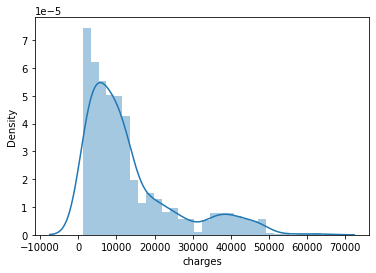

In [ ]:
sns.distplot(df['charges'])

In [ ]:
#df['charges']=np.log(df['charges'])

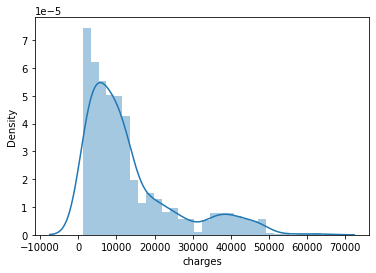

In [ ]:
sns.distplot(df['charges'])

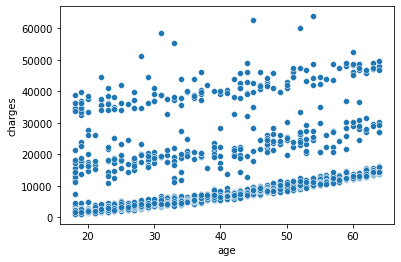

In [ ]:
sns.scatterplot(df['age'],df['charges'])

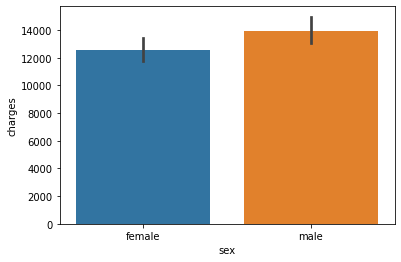

In [ ]:
sns.barplot(df['sex'],df['charges'])

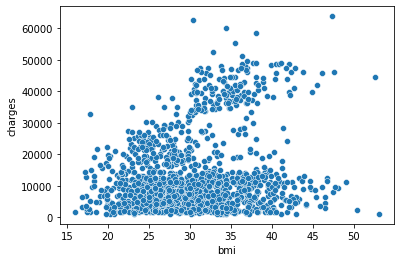

In [ ]:
sns.scatterplot(df['bmi'],df['charges'])

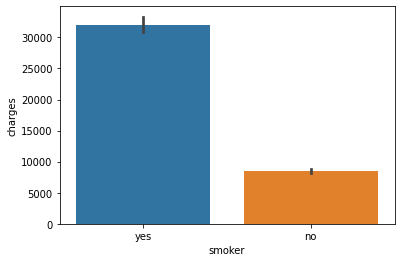

In [ ]:
sns.barplot(df['smoker'],df['charges'])

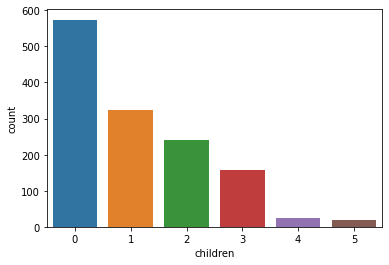

In [ ]:
sns.countplot(df['children'])

In [ ]:
df.groupby("sex").mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [ ]:
df.groupby("region").mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [ ]:
df.groupby("smoker").mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [ ]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
X=df.drop('charges',axis=1)
y=df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [ ]:
X_train.shape

(1070, 8)

In [ ]:
X_test.shape

(268, 8)

In [ ]:
y_train.shape

(1070,)

In [ ]:
y_test.shape

(268,)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
lr=LinearRegression()
dt=DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
def my_model(model):
  model.fit(X_train,y_train)
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  print("Train Data")
  print("R2 score:",round(r2_score(y_train,y_pred_train),2))
  print("RMSE Score:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
  
  print("Test Data")
  print("R2 Score:",round(r2_score(y_test,y_pred_test),2))
  print("RMSE Score:",round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2))
  return model

In [ ]:
my_model(lr)

Train Data
R2 score: 0.74
RMSE Score: 6166.4
Test Data
R2 Score: 0.8
RMSE Score: 5592.51


LinearRegression()

In [ ]:
my_model(dt)

Train Data
R2 score: 1.0
RMSE Score: 494.21
Test Data
R2 Score: 0.75
RMSE Score: 6195.29


DecisionTreeRegressor()